**Are u a DC or Marvel Fan ?** 
- Let's Analyze them briefly

In [6]:
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


marvel = pd.read_csv("D:\\DC Universe\\Ucsc\\Fourth Year\\SCS4224 Final Year Project in Computer Science\\Jupyter Notebooks\\Marvel_Characters.csv")
dc = pd.read_csv("D:\\DC Universe\\Ucsc\\Fourth Year\\SCS4224 Final Year Project in Computer Science\\Jupyter Notebooks\\DC_Characters.csv")

# Any results you write to the current directory are saved as output.

In [7]:
print ("marvel\n",marvel.sample(3))
print ("DC\n",dc.sample(3))

marvel
        page_id                  name                 urlslug               ID  \
4609      1035   Aeroika (Earth-616)   \/Aeroika_(Earth-616)              NaN   
16270   555583  Kay-Sade (Earth-616)  \/Kay-Sade_(Earth-616)              NaN   
2344     30339      Seer (Earth-616)      \/Seer_(Earth-616)  Secret Identity   

                 ALIGN  EYE        HAIR                SEX  GSM  \
4609               NaN  NaN   Gold Hair    Male Characters  NaN   
16270   Bad Characters  NaN        Bald    Male Characters  NaN   
2344   Good Characters  NaN  Black Hair  Female Characters  NaN   

                   ALIVE  APPEARANCES FIRST APPEARANCE    Year  
4609   Living Characters          6.0           Jan-80  1980.0  
16270  Living Characters          NaN              NaN     NaN  
2344   Living Characters         15.0           Aug-93  1993.0  
DC
       page_id                        name                             urlslug  \
2419   152090        Arin Sur (New Earth)        \/wi

As you see, Dataset contains
* Appearances of Characters, Name of Character, Gender, ALIGN, EYE, HAIR and some more attributes. 
* I would like to relate ALIGN and these features.

In [8]:
print("Marvel:",marvel.shape," DC:",dc.shape)

Marvel: (16376, 13)  DC: (6896, 13)


* So, DC has less characters than that of Marvel.
* There are many Marvel,DC Appearanes. But I would like to explore on data which have atleast 100 appearances.


In [9]:
marvel = marvel[marvel.APPEARANCES >= 100]
dc = dc[dc.APPEARANCES>=100]
print("Marvel:",len(marvel)," DC:",len(dc))

Marvel: 414  DC: 294


Let's see the columns

In [10]:
print("MARVEL:",marvel.columns)
print("DC:",dc.columns)

MARVEL: Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')
DC: Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')


## So, I would like to remove some columns which are not necessary for my data exploration.

In [11]:
marvel.drop(columns=['ID','urlslug','GSM','FIRST APPEARANCE','Year'],inplace=True)
dc.drop(columns=['ID','urlslug','GSM','FIRST APPEARANCE','YEAR'],inplace=True)

Let's see whether there are any null values....

In [12]:
print("MARVEL\n",marvel.isna().sum())
print("DC\n",dc.isna().sum())

MARVEL
 page_id         0
name            0
ALIGN          11
EYE            10
HAIR            3
SEX             3
ALIVE           0
APPEARANCES     0
dtype: int64
DC
 page_id         0
name            0
ALIGN          32
EYE            15
HAIR           38
SEX             1
ALIVE           0
APPEARANCES     0
dtype: int64


### Let's start exploring,

In [13]:
print("Marvel\n",marvel.ALIGN.value_counts(dropna=False))
print("DC\n",dc.ALIGN.value_counts(dropna=False))

Marvel
 Good Characters       265
Bad Characters         75
Neutral Characters     63
NaN                    11
Name: ALIGN, dtype: int64
DC
 Good Characters       211
NaN                    32
Bad Characters         26
Neutral Characters     25
Name: ALIGN, dtype: int64


#### I would like to replace the missing data of DC,Marvel "ALIGN" attribute to Neutral Characters.

In [14]:
marvel.ALIGN.fillna(value = "Neutral Characters",inplace = True)
dc.ALIGN.fillna(value = "Neutral Characters",inplace = True)

Let's check it

In [15]:
print("MARVEL\n",marvel.ALIGN.isna().sum())
print("DC\n",dc.ALIGN.isna().sum())

MARVEL
 0
DC
 0


### Let's explore on "EYE" column.


In [16]:
print("MARVEL\n",marvel.EYE.value_counts(dropna=False))
print("DC\n",dc.EYE.value_counts(dropna=False))

MARVEL
 Blue Eyes         180
Brown Eyes        111
Green Eyes         43
Red Eyes           14
NaN                10
Black Eyes         10
Hazel Eyes         10
White Eyes          9
Yellow Eyes         7
Grey Eyes           7
Variable Eyes       4
Gold Eyes           2
Black Eyeballs      2
Amber Eyes          1
Pink Eyes           1
Orange Eyes         1
Purple Eyes         1
Silver Eyes         1
Name: EYE, dtype: int64
DC
 Blue Eyes             148
Brown Eyes             48
Green Eyes             28
NaN                    15
Black Eyes             14
Red Eyes               13
Photocellular Eyes      8
Grey Eyes               6
Yellow Eyes             4
Hazel Eyes              4
White Eyes              3
Purple Eyes             2
Amber Eyes              1
Name: EYE, dtype: int64


#### It has many values. So I would like to generalize them.

In [17]:
eyes = ['Blue Eyes','Brown Eyes','Green Eyes','Red Eyes','Black Eyes']
eyes_after_marvel = []
for i in marvel.EYE.values:
    if i not in eyes:
        eyes_after_marvel.append('Different Eyes')
    else:
        eyes_after_marvel.append(i)
marvel['EYE'] = eyes_after_marvel
eyes_after_dc = []
for i in dc.EYE.values:
    if i not in eyes:
        eyes_after_dc.append('Different Eyes')
    else:
        eyes_after_dc.append(i)
dc['EYE'] = eyes_after_dc
print("MARVEL\n",marvel.EYE.value_counts(dropna=False))
print("DC\n",dc.EYE.value_counts(dropna=False))

MARVEL
 Blue Eyes         180
Brown Eyes        111
Different Eyes     56
Green Eyes         43
Red Eyes           14
Black Eyes         10
Name: EYE, dtype: int64
DC
 Blue Eyes         148
Brown Eyes         48
Different Eyes     43
Green Eyes         28
Black Eyes         14
Red Eyes           13
Name: EYE, dtype: int64


Now, I would like explore data only on Male,Female Characters

In [18]:
print("Marvel\n",marvel.SEX.value_counts(dropna=False))
print("DC\n",dc.SEX.value_counts(dropna=False))

Marvel
 Male Characters           281
Female Characters         128
NaN                         3
Agender Characters          1
Genderfluid Characters      1
Name: SEX, dtype: int64
DC
 Male Characters      208
Female Characters     85
NaN                    1
Name: SEX, dtype: int64


In [20]:
#let's take only Male,Female Characters Data
marvel = marvel[marvel.SEX.isin(["Male Characters","Female Characters"])]
dc = dc[dc.SEX.isin(["Male Characters","Female Characters"])]

#### So, we left with Hair,
**Since there are many types in Hair, I would like to generalize it.**

In [21]:
print("Marvel\n",marvel.HAIR.value_counts(dropna=False))
print("DC\n",dc.HAIR.value_counts(dropna=False))

Marvel
 Black Hair               106
Brown Hair                80
Blond Hair                74
Red Hair                  32
Bald                      24
No Hair                   24
White Hair                18
Strawberry Blond Hair     11
Grey Hair                 10
Auburn Hair                9
Green Hair                 6
Blue Hair                  3
NaN                        3
Silver Hair                3
Pink Hair                  1
Orange Hair                1
Gold Hair                  1
Purple Hair                1
Variable Hair              1
Reddish Blond Hair         1
Name: HAIR, dtype: int64
DC
 Black Hair               81
Blond Hair               54
Brown Hair               50
NaN                      37
Red Hair                 28
White Hair               23
Strawberry Blond Hair     7
Grey Hair                 7
Green Hair                5
Silver Hair               1
Name: HAIR, dtype: int64


In [22]:
hair = ["Black Hair","Brown Hair","Blond Hair","Red Hair","Bald","No Hair","White Hair","Strawberry Blond Hair","Grey Hair","Auburn Hair"]
hair_after_marvel = []
for i in marvel.HAIR.values:
    if i not in hair:
        hair_after_marvel.append('Different Hair')
    else:
        hair_after_marvel.append(i)
marvel['HAIR'] = hair_after_marvel
hair_after_dc = []
for i in dc.HAIR.values:
    if i not in hair:
        hair_after_dc.append('Different Hair')
    else:
        hair_after_dc.append(i)
dc['HAIR'] = hair_after_dc
print("MARVEL\n",marvel.HAIR.value_counts(dropna=False))
print("DC\n",dc.HAIR.value_counts(dropna=False))

MARVEL
 Black Hair               106
Brown Hair                80
Blond Hair                74
Red Hair                  32
No Hair                   24
Bald                      24
Different Hair            21
White Hair                18
Strawberry Blond Hair     11
Grey Hair                 10
Auburn Hair                9
Name: HAIR, dtype: int64
DC
 Black Hair               81
Blond Hair               54
Brown Hair               50
Different Hair           43
Red Hair                 28
White Hair               23
Strawberry Blond Hair     7
Grey Hair                 7
Name: HAIR, dtype: int64


#### Let's see whether the updated data has any missing info

In [23]:
#so now, data doesn't have any missing values
print("MARVEL\n",marvel.isna().sum())
print("DC\n",dc.isna().sum())


MARVEL
 page_id        0
name           0
ALIGN          0
EYE            0
HAIR           0
SEX            0
ALIVE          0
APPEARANCES    0
dtype: int64
DC
 page_id        0
name           0
ALIGN          0
EYE            0
HAIR           0
SEX            0
ALIVE          0
APPEARANCES    0
dtype: int64


* **Data Exploration**

In [24]:
print("GOOD Characters of MARVEL EYE color\n",marvel[marvel.ALIGN.isin(['Good Characters'])].EYE.value_counts())
print("GOOD Characters of DC EYE color\n",dc[dc.ALIGN.isin(['Good Characters'])].EYE.value_counts())

GOOD Characters of MARVEL EYE color
 Blue Eyes         126
Brown Eyes         72
Different Eyes     31
Green Eyes         26
Black Eyes          5
Red Eyes            4
Name: EYE, dtype: int64
GOOD Characters of DC EYE color
 Blue Eyes         111
Brown Eyes         33
Different Eyes     33
Green Eyes         20
Black Eyes          7
Red Eyes            6
Name: EYE, dtype: int64


#### Let's see the percentage of Good and bad characters

MARVEL
 Good Characters       0.645477
Bad Characters        0.183374
Neutral Characters    0.171149
Name: ALIGN, dtype: float64
DC
 Good Characters       0.716724
Neutral Characters    0.194539
Bad Characters        0.088737
Name: ALIGN, dtype: float64


Text(0.5, 1.0, 'MARVEL')

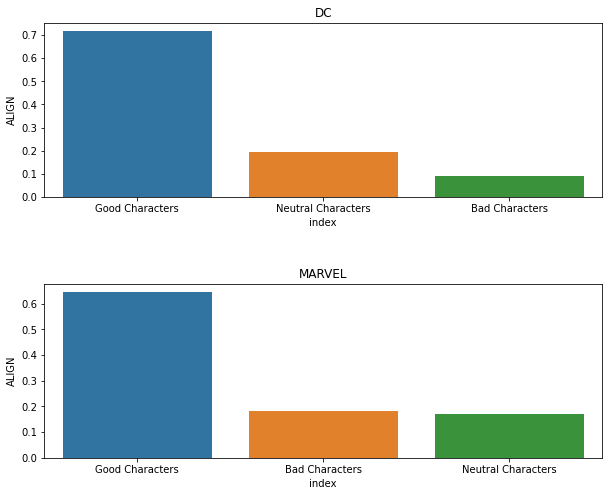

In [26]:
print("MARVEL\n",marvel.ALIGN.value_counts(normalize=True))
print("DC\n",dc.ALIGN.value_counts(normalize=True))

dc_vc = dc.ALIGN.value_counts(normalize=True).reset_index()
marvel_vc = marvel.ALIGN.value_counts(normalize=True).reset_index()
fig, axs = plt.subplots(nrows=2)
plt.subplots_adjust(hspace=0.5)
fig.set_size_inches(10, 8)

sns.barplot(x='index',y='ALIGN',data = dc_vc,ax=axs[0]).set_title('DC')
sns.barplot(x='index',y='ALIGN',data = marvel_vc,ax=axs[1]).set_title('MARVEL')

Now, We can see that,
* DC has **71.6%** Good characters
* Marvel has  **64.5%** of Good Characters



#### Let's see some plots and try to find some insights.
* Is there any relation between EYES and Characters?

Text(0.5, 1.0, 'MARVEL')

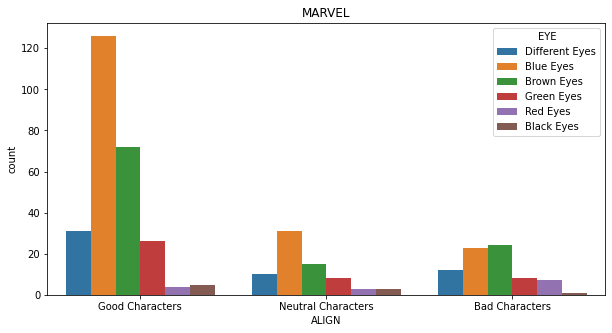

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x="ALIGN", data=marvel,hue = 'EYE').set_title("MARVEL")

As we see above, we can say that majority of characters have Blue eyes. But we can't say the proportion.
**Bad Characters of MARVEL mostly have Brown Eyes compared to that of Blue eyes.**

Text(0.5, 1.0, 'DC')

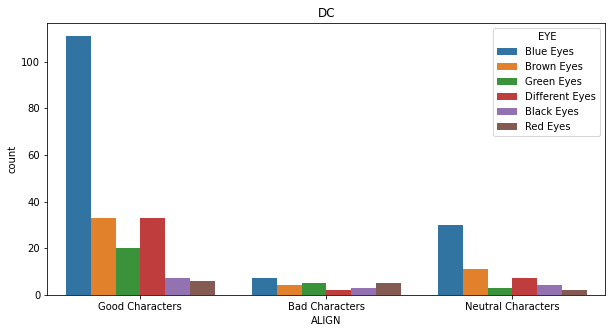

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x="ALIGN", data=dc,hue = 'EYE').set_title("DC")

**Unless we see in terms of Percentage, we can't analyze.**

Text(0.5, 1.0, 'MARVEL')

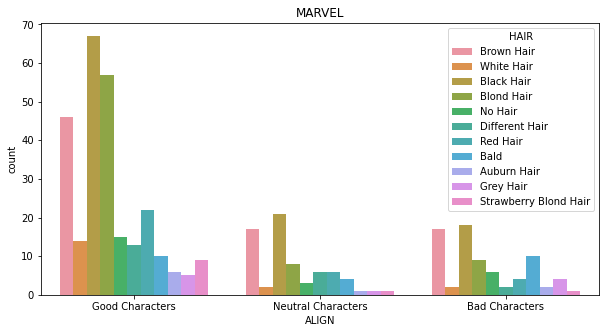

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="ALIGN", data=marvel,hue = 'HAIR').set_title("MARVEL")

Text(0.5, 1.0, 'DC')

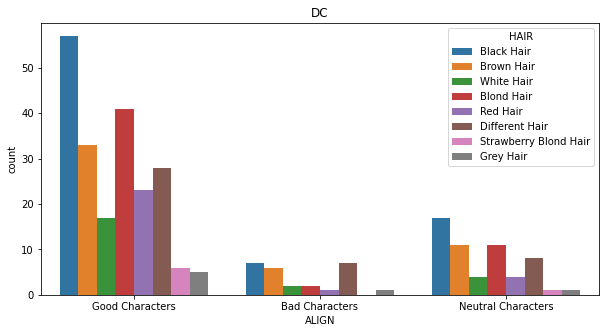

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="ALIGN", data=dc,hue = 'HAIR').set_title("DC")

**MARVEL**

Text(0.5, 1.0, 'MARVEL')

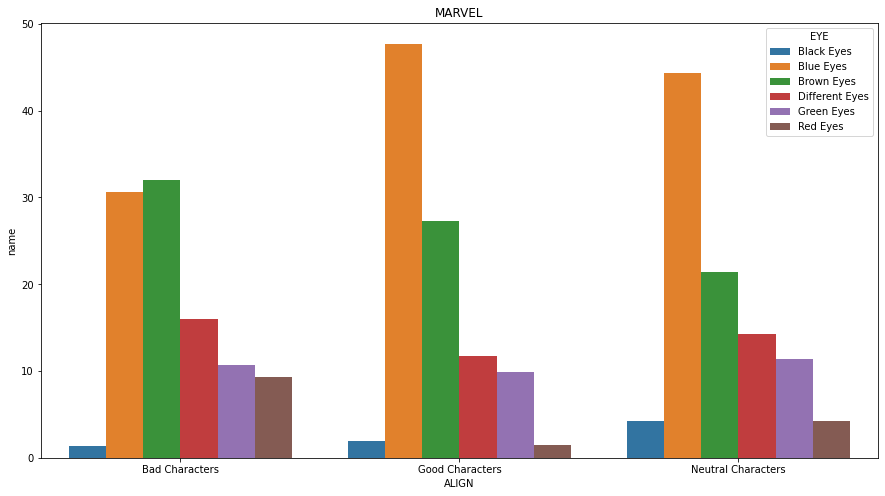

In [31]:
character_eyes = marvel.groupby(['ALIGN','EYE']).count().name.reset_index()
character_eyes = character_eyes.groupby(['ALIGN','EYE']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_eyes
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue='EYE',data=character_eyes).set_title("MARVEL")

**MARVEL**<br>
We can see that,
* **Red eyes(also Green eyes, different eyes)** constitute more to Bad Characters than that of those contributing to GOOD characters.
* **Blue and Brown eyes** constitute to around (70-80 %) for non-bad Characters
* But for Bad Characters, **Blue,brown constitute around 60%**


Text(0.5, 1.0, 'DC')

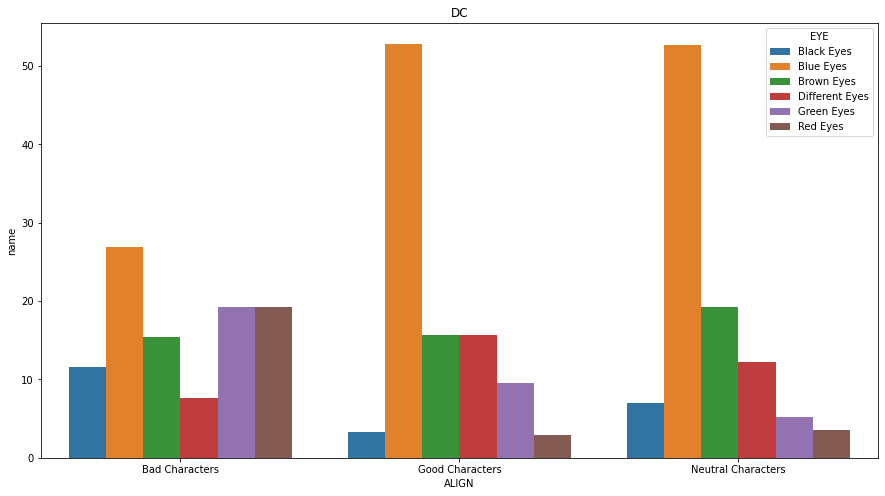

In [32]:
character_eyes = dc.groupby(['ALIGN','EYE']).count().name.reset_index()
character_eyes = character_eyes.groupby(['ALIGN','EYE']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_eyes
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue='EYE',data=character_eyes).set_title("DC")

**DC**<br>
As you see,
* **Blue eyes** are common for GOOD,Neutal Characters (>50%) but not for BAD characters
* **Green eyes and Red eyes** constitute more percentage for BAD characters compared to that of GOOD characters

So, we can generalize that,
* if there's any character with **Red eyes, it may align to BAD character**

Let's see what can we find based on Hair and Align

Text(0.5, 1.0, 'MARVEL')

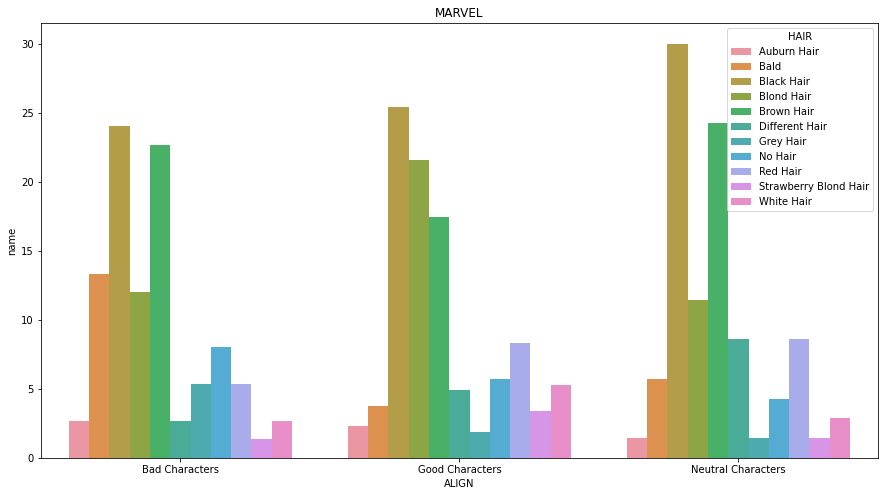

In [33]:
character_hair = marvel.groupby(['ALIGN','HAIR']).count().name.reset_index()
character_hair = character_hair.groupby(['ALIGN','HAIR']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_hair
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue='HAIR',data=character_hair).set_title("MARVEL")

**MARVEL** <br>
We can see that,
* **Bald Hair** percentage for Bad Characters is more than Good Characters.
* **Blond Hair** Percentage is less for Bad Characters compared to that of Good Characters.
* Also, Different hair has more percentage to Bad Characters compared to that of Good  Characters.
* Good Characters has less **Brown Hair** Percentage than that of Bad Characters
But still, we can't differentiate Good and Bad characters based on Hair,Eyes

Text(0.5, 1.0, 'DC')

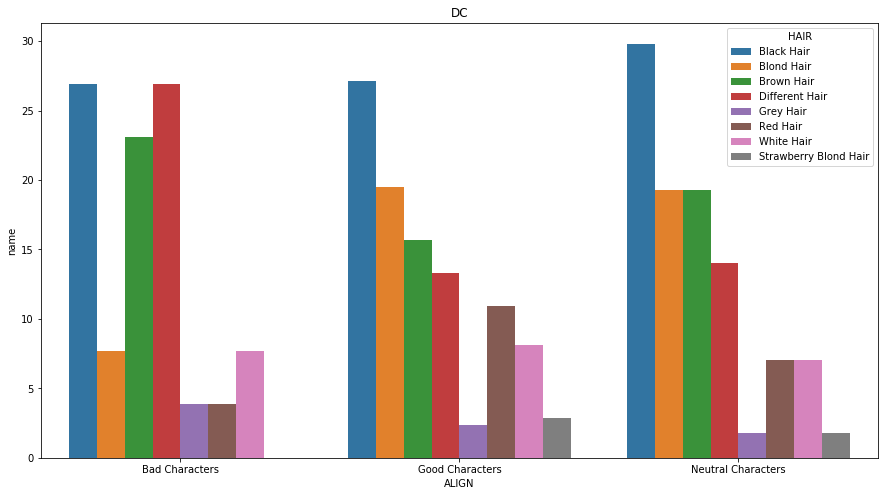

In [27]:
character_hair = dc.groupby(['ALIGN','HAIR']).count().name.reset_index()
character_hair = character_hair.groupby(['ALIGN','HAIR']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_hair
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue='HAIR',data=character_hair).set_title("DC")

**DC** <br>
We can see that,
* Different Hair percentage for Bad Characters is more than Good Characters.
* **Blond Hair Percentage is less for Bad Characters compared to that of Good Characters.**
* Good Characters has less Brown Hair Percentage than that of Bad Characters.
But still, we can't differentiate Good and Bad characters based on **Hair,Eyes**

Let's see the Gender of data. 

Text(0.5, 1.0, 'MARVEL')

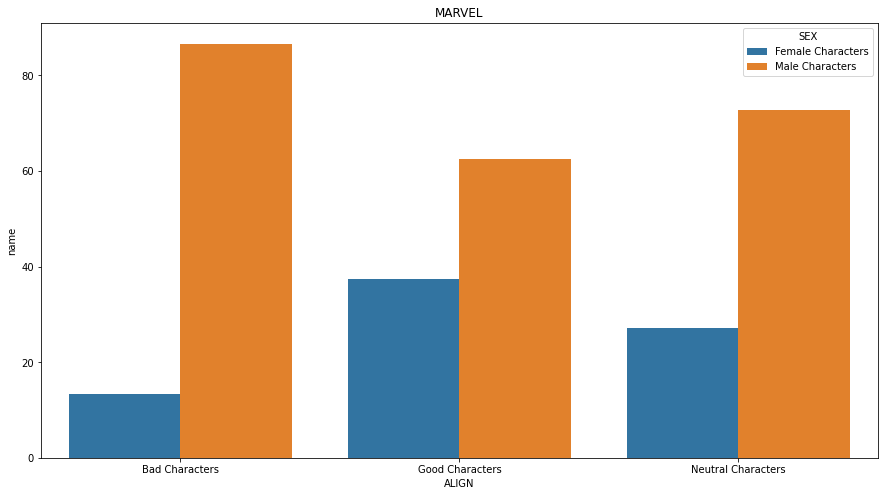

In [34]:
character_gender = marvel.groupby(['ALIGN','SEX']).count().name.reset_index()
character_gender = character_gender.groupby(['ALIGN','SEX']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_gender
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue='SEX',data=character_gender).set_title("MARVEL")

**MARVEL** <br>
As we can see,
it's almost like
* **Good Characters :**
*         60 - 40 ratio(Male/Female)

* **Bad Characters**
*         85 - 15 ratio(Male/Female)

Text(0.5, 1.0, 'CD')

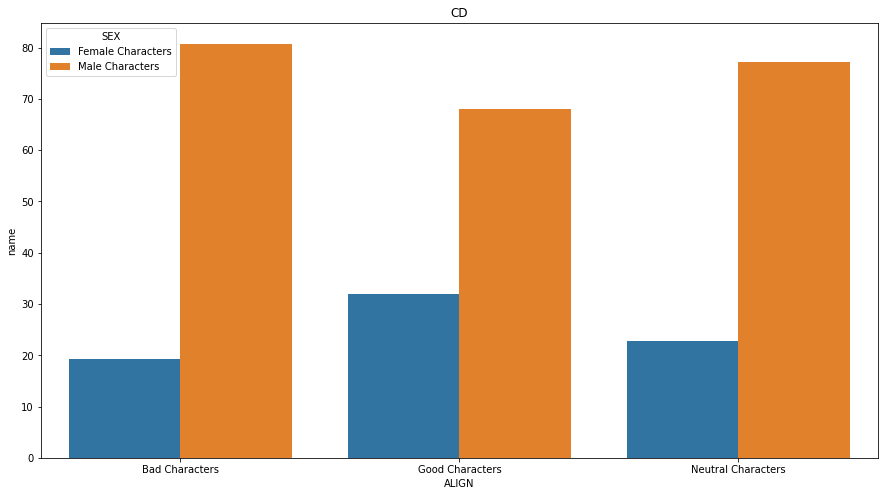

In [35]:
character_gender = dc.groupby(['ALIGN','SEX']).count().name.reset_index()
character_gender = character_gender.groupby(['ALIGN','SEX']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_gender
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue='SEX',data=character_gender).set_title("CD")

**DC** <br>
As we can see,
it's almost like
* **Good Characters :**
*         70 - 30 ratio(Male/Female)

* **Bad Characters**
*         80 - 20 ratio(Male/Female)

Let's see **DC's & MARVEL's** most Appearances

In [36]:
print("Top 10 most appearances of DC\n",dc.sort_values(by='APPEARANCES',ascending=False)[:11][['name','APPEARANCES']])
print("Top 10 most appearances of MARVEL\n",marvel.sort_values(by='APPEARANCES',ascending=False)[:10][['name','APPEARANCES']])


Top 10 most appearances of DC
                               name  APPEARANCES
0             Batman (Bruce Wayne)       3093.0
1            Superman (Clark Kent)       2496.0
2       Green Lantern (Hal Jordan)       1565.0
3         James Gordon (New Earth)       1316.0
4      Richard Grayson (New Earth)       1237.0
5      Wonder Woman (Diana Prince)       1231.0
6           Aquaman (Arthur Curry)       1121.0
7        Timothy Drake (New Earth)       1095.0
8   Dinah Laurel Lance (New Earth)       1075.0
10                      GenderTest       1028.0
9              Flash (Barry Allen)       1028.0
Top 10 most appearances of MARVEL
                                   name  APPEARANCES
0            Spider-Man (Peter Parker)       4043.0
1      Captain America (Steven Rogers)       3360.0
2  Wolverine (James \"Logan\" Howlett)       3061.0
3    Iron Man (Anthony \"Tony\" Stark)       2961.0
4                  Thor (Thor Odinson)       2258.0
5           Benjamin Grimm (Earth-616)       2

let's see Death of characters percentage.
**MARVEL**

Text(0.5, 1.0, 'MARVEL')

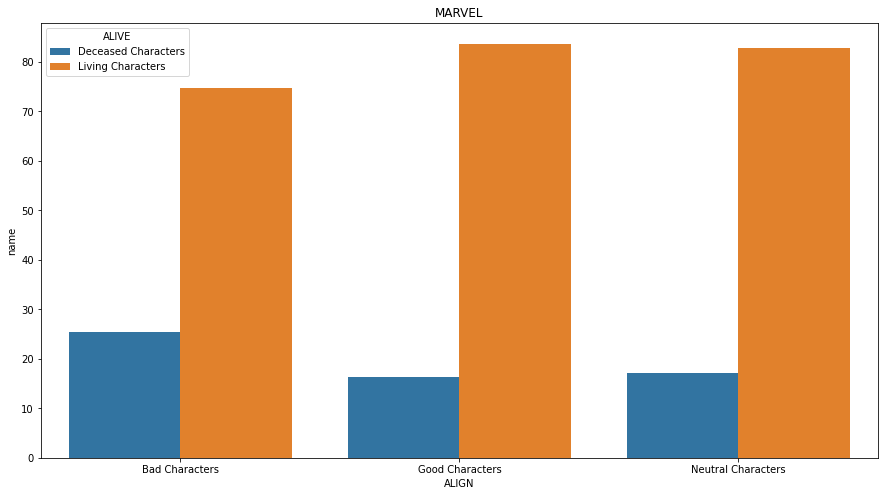

In [37]:
character_alive = marvel.groupby(['ALIGN',"ALIVE"]).count().name.reset_index()
character_alive = character_alive.groupby(['ALIGN',"ALIVE"]).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_alive
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue="ALIVE",data=character_alive).set_title("MARVEL")

So,
* There are more deaths for **Bad Characters** compared to that of Good Characters.

Text(0.5, 1.0, 'DC')

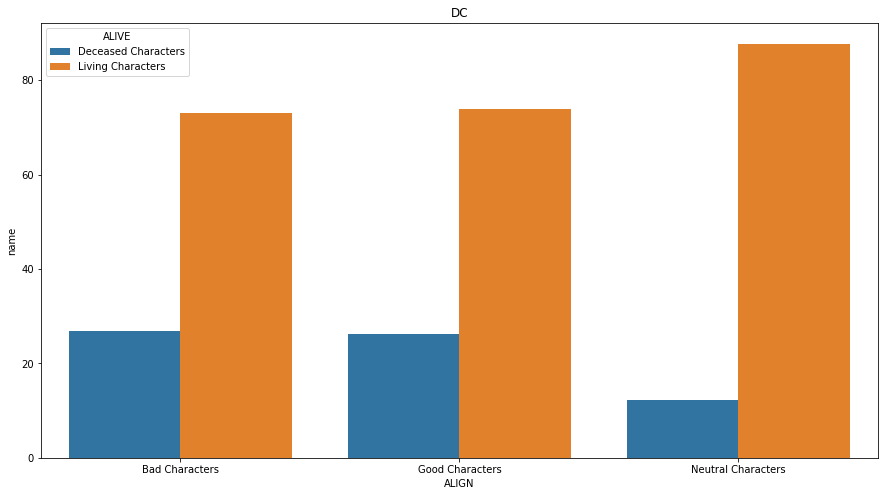

In [38]:
character_alive = dc.groupby(['ALIGN',"ALIVE"]).count().name.reset_index()
character_alive = character_alive.groupby(['ALIGN',"ALIVE"]).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_alive
plt.figure(figsize=(15,8))
sns.barplot(x="ALIGN",y='name', hue="ALIVE",data=character_alive).set_title("DC")

So,
* There are more deaths for **Neutral Characters** compared to that of other characters.

* There's much more to update. Please give any suggestions for exploring further.
- Just an observation...